In [1]:
import numpy as np
import sys
#np.set_printoptions(precision=5, linewidth=200, suppress=True)
import psi4
from helper_PFCI import PFHamiltonianGenerator
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', True)
from psi4.driver.procrouting.response.scf_response import tdscf_excitations
import json 

In [2]:
# cc-pVDZ/B3LYP optimized geometry for formaldehyde
zmat = """
0 1
O                 
C             1    1.203950
H             2    1.120350      1  122.478805
H             2    1.120350      1  122.478805      3  180.000000
symmetry c1
"""

molstr = """

0 1
O     0.0000000000   0.0000000000   0.6026820956
C     0.0000000000  -0.0000000000  -0.6012798060
H     0.0000000000   0.9450451520  -1.2028332857
H     0.0000000000  -0.9450451520  -1.2028332857
no_reorient
symmetry c1
"""

options_dict = {
    "basis": "cc-pVDZ",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    "save_jk" : True,
    "opt_coordinates" : "both"
}



psi4.set_options(options_dict)
mol = psi4.geometry(zmat)
psi4.optimize("b3lyp")


Optimizer: Optimization complete!


-114.50763966947598

In [15]:
scf_e, wfn = psi4.energy('b3lyp', return_wfn=True)
res = tdscf_excitations(wfn, states=4, triplets = "NONE")
en = [r["EXCITATION ENERGY"]+scf_e for r in res]
print(en)

[-114.36003777283648, -114.21381090577653, -114.1709818549366, -114.16075193050966]


In [72]:
mol_tmpl = """
0 1
O                 
C             1    **R**
H             2    1.120350      1  122.478805
H             2    1.120350      1  122.478805      3  180.000000
symmetry c1
"""



N_R = 50
N_el = 10
r_array = np.linspace(1.0, 1.8, N_R)

# for pcqed results
dft_E_array = np.zeros((N_R, N_el))
#Mu_array = np.zeros((N_R, N_el, N_el, 3))

# scqed results
#sc_E_array_np_1 = np.zeros((N_R, 10))
#sc_E_array_np_6 = np.zeros((N_R, 10))

psi4.set_options(options_dict)

r_idx = 0
for r in r_array:
    mol_str = mol_tmpl.replace("**R**", str(r))
    print(mol_str)
    mol = psi4.geometry(mol_str)
    scf_e, wfn = psi4.energy('b3lyp', return_wfn=True)
    res = tdscf_excitations(wfn, states=N_el, triplets = "NONE")
    en = [r["EXCITATION ENERGY"]+scf_e for r in res]
    dft_E_array[r_idx, :] = np.array(en)
    r_idx += 1




0 1
O                 
C             1    1.0
H             2    1.120350      1  122.478805
H             2    1.120350      1  122.478805      3  180.000000
symmetry c1


0 1
O                 
C             1    1.0163265306122449
H             2    1.120350      1  122.478805
H             2    1.120350      1  122.478805      3  180.000000
symmetry c1


0 1
O                 
C             1    1.0326530612244897
H             2    1.120350      1  122.478805
H             2    1.120350      1  122.478805      3  180.000000
symmetry c1


0 1
O                 
C             1    1.0489795918367346
H             2    1.120350      1  122.478805
H             2    1.120350      1  122.478805      3  180.000000
symmetry c1


0 1
O                 
C             1    1.0653061224489795
H             2    1.120350      1  122.478805
H             2    1.120350      1  122.478805      3  180.000000
symmetry c1


0 1
O                 
C             1    1.0816326530612246
H            


0 1
O                 
C             1    1.7183673469387757
H             2    1.120350      1  122.478805
H             2    1.120350      1  122.478805      3  180.000000
symmetry c1


0 1
O                 
C             1    1.7346938775510203
H             2    1.120350      1  122.478805
H             2    1.120350      1  122.478805      3  180.000000
symmetry c1


0 1
O                 
C             1    1.7510204081632654
H             2    1.120350      1  122.478805
H             2    1.120350      1  122.478805      3  180.000000
symmetry c1


0 1
O                 
C             1    1.7673469387755103
H             2    1.120350      1  122.478805
H             2    1.120350      1  122.478805      3  180.000000
symmetry c1


0 1
O                 
C             1    1.7836734693877552
H             2    1.120350      1  122.478805
H             2    1.120350      1  122.478805      3  180.000000
symmetry c1


0 1
O                 
C             1    1.8
H            

In [73]:
dft_e0_array = np.copy(dft_E_array[:,0])
dft_e1_array = np.copy(dft_E_array[:,1])
dft_e2_array = np.copy(dft_E_array[:,2])
dft_e3_array = np.copy(dft_E_array[:,3])
dft_e4_array = np.copy(dft_E_array[:,4])


In [67]:
safe_e1_array = np.copy(e1_array)
safe_e2_array = np.copy(e2_array)
safe_e3_array = np.copy(e3_array)


In [60]:
e2_array[10:] = np.copy(safe_e3_array[10:])
e3_array[10:] = np.copy(safe_e2_array[10:])

In [61]:
e1_array[20:] = np.copy(e3_array[20:])
e3_array[20:] = np.copy(safe_e1_array[20:])




In [63]:
safe_e1_array = np.copy(e1_array)
safe_e2_array = np.copy(e2_array)
safe_e3_array = np.copy(e3_array)

In [64]:
e2_array[23:] = np.copy(safe_e3_array[23:])
e3_array[23:] = np.copy(safe_e2_array[23:])


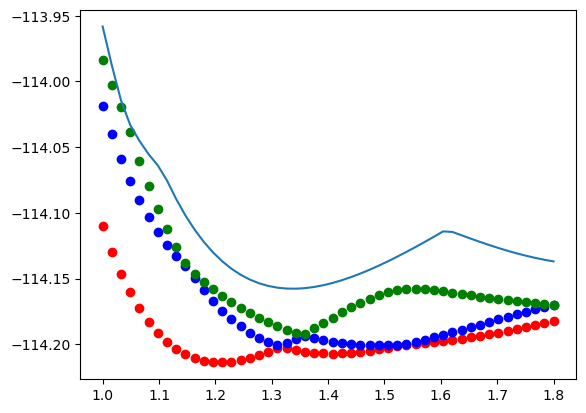

In [68]:
from matplotlib import pyplot as plt
#plt.plot(r_array, E_array[:,0])
plt.plot(r_array, e1_array, 'ro')
plt.plot(r_array, e2_array, 'bo')
plt.plot(r_array, e3_array, 'go')
plt.plot(r_array, E_array[:,4])
#plt.plot(r_array, E_array[:,5])
#plt.plot(r_array, E_array[:,6])
plt.show()


In [76]:
dictionary = {
  "repo" : {
      
      "repository_url" : "https://github.com/mapol-chem/qed-ci",
      "branch" : "photon_number_basis",
      "commit" : "sha"
  },
    
  "molecule" : {
    "molecule_name": "CH2O",
    "geometry": [],
    "symbols": [
      "O",
      "C",
    "H",
    "H"
    ],
    "z-matrix" : mol_str,
    "bond_length" : 1.8,
  },
    "driver": "energy",
    "model" : {
        "method" : "qed-fci",
        "orbital_basis"  : "cc-pVDZ",
        "photon_basis" : "number_basis",
        "number_of_photon_states" : scqed_dict["number_of_photons"],
        "lambda" : [
            scqed_dict["lambda_vector"][0],
            scqed_dict["lambda_vector"][1],
            scqed_dict["lambda_vector"][2]
        ],
        "omega" : scqed_dict["omega_value"]  
    },
    
    "return_result" : [
        
    ],
    
    "cavity_free_rhf_energy" : 0.,
    "qed_rhf_energy" : 0.,
    "cavity_free_fci_ground_state_energy" : 0.,
}

# function to generate file names based on system details
def generate_file_name(dic, r):
    string_r = "{:.3f}".format(r)
    file_name = dic["molecule"]["molecule_name"] + "_"
    file_name += "r_" + string_r + "_"
    file_name += str(dictionary["model"]["method"]) + "_"
    file_name += str(dictionary["model"]["orbital_basis"]) + "_"
    file_name += str(dictionary["model"]["photon_basis"]) + "_"
    file_name += str(dictionary["model"]["number_of_photon_states"]) + "_"
    file_name += "lambda_" + str(dictionary["model"]["lambda"][0]) 
    file_name += "_" + str(dictionary["model"]["lambda"][1]) 
    file_name += "_" + str(dictionary["model"]["lambda"][2]) + "_"
    file_name += "omega_" + str(dictionary["model"]["omega"]) + ".json"
    return file_name

In [96]:

pcqed_dict = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0]),
    'ci_level' : 'cas',
    'full_diagonalization' : True,
    'nact_orbs' : 8,
    'nact_els' : 6,
    'number_of_photons' : 0
}

scqed_dict = {
    'omega_value' : 0.238871,
    'lambda_vector' : np.array([0, 0, 0.04]),
    'ci_level' : 'cas',
    'full_diagonalization' : True,
    'nact_orbs' : 8,
    'nact_els' : 6,
    'number_of_photons' : 1
}


mol = psi4.geometry(mol_str)
psi4.set_options(options_dict)

#pcqed_res = PFHamiltonianGenerator(
#    mol_str,
#    options_dict,
#    pcqed_dict
#)

#scqed_res = PFHamiltonianGenerator(
#    mol_str,
#    options_dict,
#    scqed_dict
#)




In [107]:
mol_tmpl = """
0 1
O                 
C             1    **R**
H             2    1.120350      1  122.478805
H             2    1.120350      1  122.478805      3  180.000000
symmetry c1
"""



N_R = 50
N_el = 10
r_array = np.linspace(1.0, 1.8, N_R)

# for pcqed results
E_array = np.zeros((N_R, N_el))

# scqed results
sc_E_array = np.zeros((N_R, N_el))


r_idx = 0
for r in r_array:
    mol_str = mol_tmpl.replace("**R**", str(r))
    print(mol_str)
    mol = psi4.geometry(mol_str)
    pcqed_res = PFHamiltonianGenerator(mol_str, options_dict, pcqed_dict)
    E_array_68[r_idx, :] = pcqed_res.CIeigs[:N_el]
    
    scqed_res = PFHamiltonianGenerator(mol_str, options_dict, scqed_dict)
    sc_E_array_68[r_idx, :] = scqed_res.CIeigs[:N_el]
    r_idx += 1





0 1
O                 
C             1    1.0
H             2    1.120350      1  122.478805
H             2    1.120350      1  122.478805      3  180.000000
symmetry c1

 Completed QED-RHF in 0.2585461139678955 seconds
 Completed 1HSO Build in 0.001463174819946289 seconds
 Completed ERI Build in 0.37861204147338867 seconds 
 Completed 2D build in 0.39360475540161133 seconds
 Completed 1G build in 0.0003819465637207031 seconds
Generating all determinants in active space
 Completed determinant list in 0.04409289360046387 seconds 
 Completed constant offset matrix in 0.035890817642211914 seconds
 Completed Hamiltonian build in 40.34245038032532 seconds

0 1
O                 
C             1    1.2
H             2    1.120350      1  122.478805
H             2    1.120350      1  122.478805      3  180.000000
symmetry c1

 Completed QED-RHF in 0.22411799430847168 seconds
 Completed 1HSO Build in 0.0015659332275390625 seconds
 Completed ERI Build in 0.3760852813720703 seconds 
 Complete

In [108]:
sr_array = np.copy(r_array)
r_array = np.linspace(1.0, 1.8, 50)
#cas_e0_array = np.copy(E_array[:,0])
#cas_e1_array = np.copy(E_array[:,1])
#cas_e2_array = np.copy(E_array[:,2])
#cas_e3_array = np.copy(E_array[:,3])
#cas_e4_array = np.copy(E_array[:,4])

#qedcas_e0_array = np.copy(sc_E_array[:,0])
#qedcas_e1_array = np.copy(sc_E_array[:,1])
#qedcas_e2_array = np.copy(sc_E_array[:,2])
#qedcas_e3_array = np.copy(sc_E_array[:,3])
#qedcas_e4_array = np.copy(sc_E_array[:,4])
print(E_array_68)

[[-113.80288061 -113.58468898 -113.5601473  -113.49689875 -113.46714145
  -113.42184755 -113.41002946 -113.36290919 -113.35365028 -113.33777705]
 [-113.90268103 -113.72482488 -113.70468272 -113.66972169 -113.56742386
  -113.54754262 -113.54624003 -113.51493224 -113.49355279 -113.48711801]
 [-113.86607202 -113.73891907 -113.72790164 -113.72617431 -113.60069394
  -113.57265343 -113.553439   -113.53116925 -113.51603685 -113.48386385]
 [-113.80970857 -113.72699123 -113.72355    -113.72067671 -113.60321752
  -113.59583854 -113.57238955 -113.56917666 -113.53983954 -113.53305232]
 [-113.74859516 -113.6973218  -113.69603565 -113.69547567 -113.60279585
  -113.60199405 -113.59736496 -113.57039042 -113.56480732 -113.55096776]]


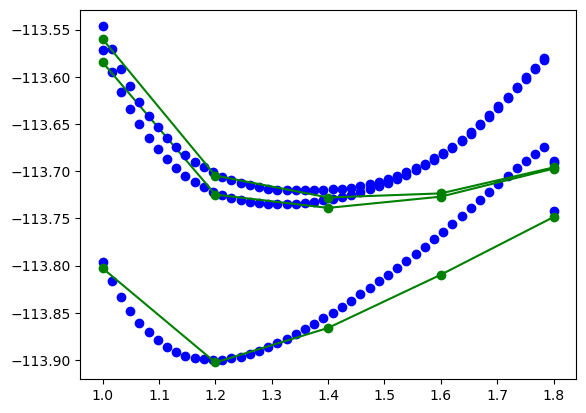

In [113]:
#plt.plot(r_array, dft_e0_array, 'ro')
plt.plot(r_array, cas_e0_array, 'bo')
plt.plot(sr_array, E_array_68[:,0], 'g-o')
#plt.plot(r_array, dft_e1_array, 'ro')
plt.plot(r_array, cas_e1_array, 'bo')
plt.plot(sr_array, E_array_68[:,1], 'g-o')
plt.plot(r_array, cas_e2_array, 'bo')
plt.plot(sr_array, E_array_68[:,2], 'g-o')
#plt.plot(r_array, qedcas_e0_array, 'go')
#plt.plot(r_array, dft_e1_array, 'r*')
#plt.plot(r_array, cas_e1_array, 'b*')
#plt.plot(r_array, dft_e2_array, 'r--')
#plt.plot(r_array, cas_e2_array, 'b--')
#plt.plot(r_array, dft_e3_array, 'r^')
#plt.plot(r_array, cas_e3_array, 'b^')
#plt.plot(r_array, qedcas_e1_array, 'g*')

#plt.plot(r_array, e1_array, 'ro')
#plt.plot(r_array, e2_array, 'bo')
#plt.plot(r_array, e3_array, 'go')
#plt.plot(r_array, E_array[:,4])
#plt.plot(r_array, E_array[:,5])
#plt.plot(r_array, E_array[:,6])
#plt.xlim(1.0, 1.13)
plt.show()



In [18]:
nop = np.copy(sc_E_array_np_6[:8,1])
lup = np.copy(sc_E_array_np_6[:8,2])
#E_array[10,2] = nop1
#E_array[10,1] = lup1

sc_E_array_np_6[:8,2] = np.copy(nop)
sc_E_array_np_6[:8,1] = np.copy(lup)

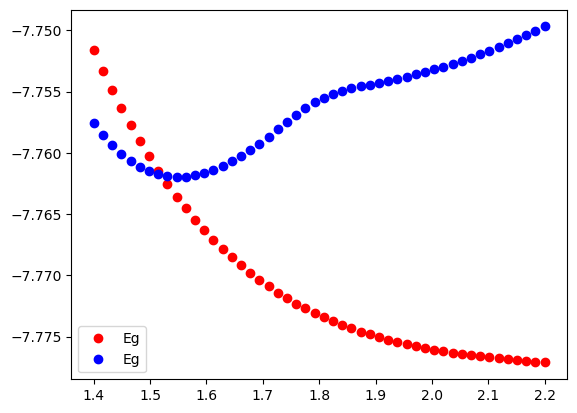

In [19]:
#print(r_array)
#print(E_array[:,1]-E_array[:,0])

#plt.plot(r_array, E_array[:,0]+0.1208, label="E0")
#plt.plot(r_array, E_array[:,1], label="E1")
#plt.plot(r_array, E_array[:,2], label="E2")

plt.plot(r_array, sc_E_array_np_6[:,1], 'ro', label="Eg")
plt.plot(r_array, sc_E_array_np_6[:,2], 'bo', label="Eg")
#plt.plot(r_array, E_array[:,3], label="E3")
plt.legend()
#plt.xlim(1.79, 1.81)
plt.show()

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [20]:
def build_pf_hamiltonian(n_el, n_ph, E_R, omega, lamvec, mu):
    """
    Given an array of n_el E_R values and an n_ph states with fundamental energy omega
    build the PF Hamiltonian
    
    n_el : int
        the number of electronic states (n_el = 1 means only ground-state)
    
    n_ph : int
        the number of photon occupation states (n_ph = 1 means only the |0> state)
    
    E_R : np.array of floats
        the electronic energies
        
    omega : float
        the energy of the photonic mode
        
    lamvec : np.array of floats
        the lambda vector
        
    mu : (n_el x n_el x 3) np.array of floats 
        mu[i, j, k] is the kth cartesian component of the dipole moment expectation value between 
        state i and state j
    
    """
    H_PF = np.zeros((n_el * n_ph, n_el * n_ph))
    
    # take care of the diagonals first
    # bare electronic and photonic energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            H_PF[na,na] = E_R[a] + n * omega
        
    # diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for g in range(n_el):
                H_PF[na,na] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g,a,:])
            
    # off-diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for b in range(n_el):
                nb = n * n_el + b
                for g in range(n_el):
                    if a != b:
                        H_PF[na, nb] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g, b, :])
                
    # off-diagonal bilinear coupling
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            
            for m in range(n_ph):
                for b in range(n_el):
                    mb = m * n_el + b
                    
                    if n == (m-1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na,mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        
                    elif n == (m+1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na, mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1)
                        
    
    return H_PF


def MAE(E, Ep):
    """
    function to return the mean absolute error of the approximate PES stored in Ep relative to 
    the exact PES stored in E
    """
    # get length
    _NR = len(E)
    
    # take element-by-element difference
    _diff = E - Ep
    
    # compute absolute value of differences
    _absdiff = np.abs(_diff)
    
    # return sum divided by _NR
    return np.sum(_absdiff) / _NR
                
            

        
    
    

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [21]:
np.set_printoptions(precision=6, linewidth=200, suppress=True)
omega_cav = 0.12086
lambda_vector = np.array([0., 0., 0.01])
N_el = 3
N_ph = 2

_HPF = build_pf_hamiltonian(N_el, N_ph, E_array[0,:], omega_cav, lambda_vector, Mu_array[0, :, :, :])
print("H")
print(_HPF)

H
[[-7.878268 -0.000004  0.        0.       -0.001482  0.      ]
 [-0.000004 -7.736071 -0.       -0.001482  0.        0.      ]
 [ 0.       -0.       -7.6824    0.        0.        0.      ]
 [ 0.       -0.001482  0.       -7.757408 -0.000004  0.      ]
 [-0.001482  0.        0.       -0.000004 -7.615211 -0.      ]
 [ 0.        0.        0.        0.       -0.       -7.56154 ]]


In [23]:
N_el = 50
N_ph = 6
pcqed_nel50_np6 = np.zeros((N_R, N_el * N_ph ))
for k in range(N_R):           
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[k,:], omega_cav, lambda_vector, Mu_array[k, :, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)
    pcqed_nel50_np6[k,:] = pf_e



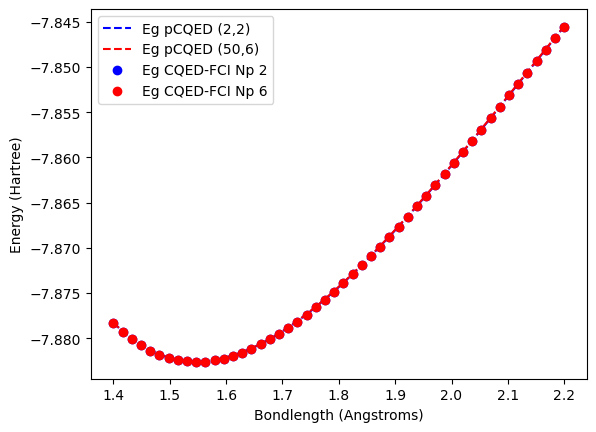

In [30]:


plt.plot(r_array, pcqed_nel2_np2[:,0], 'b--', label="Eg pCQED (2,2)")
plt.plot(r_array, pcqed_nel50_np6[:,0], 'r--', label="Eg pCQED (50,6)")
plt.plot(r_array, sc_E_array_np_1[:,0], 'bo', label="Eg CQED-FCI Np 2")
plt.plot(r_array, sc_E_array_np_6[:,0], 'ro', label="Eg CQED-FCI Np 6")
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

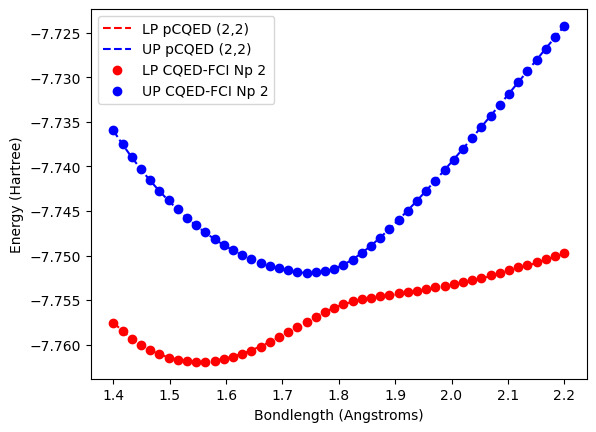

In [26]:

plt.plot(r_array, pcqed_nel2_np2[:,1], 'r--', label="LP pCQED (2,2)")
plt.plot(r_array, pcqed_nel2_np2[:,2], 'b--', label="UP pCQED (2,2)")
plt.plot(r_array, sc_E_array_np_1[:,2], 'ro', label="LP CQED-FCI Np 2")
plt.plot(r_array, sc_E_array_np_1[:,3], 'bo', label="UP CQED-FCI Np 2")
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

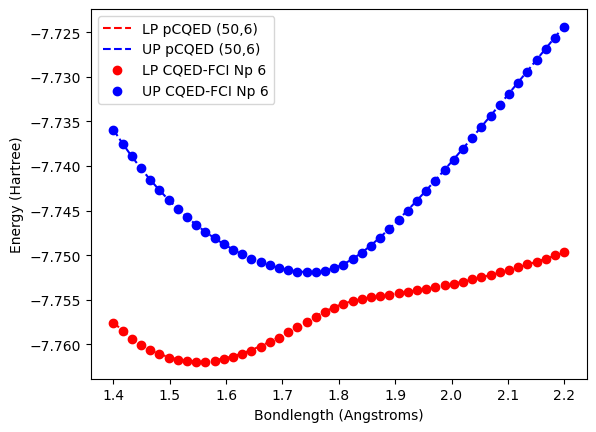

In [31]:
plt.plot(r_array, pcqed_nel50_np6[:,1], 'r--', label="LP pCQED (50,6)")
plt.plot(r_array, pcqed_nel50_np6[:,2], 'b--', label="UP pCQED (50,6)")
plt.plot(r_array, sc_E_array_np_6[:,2], 'ro', label="LP CQED-FCI Np 6")
plt.plot(r_array, sc_E_array_np_6[:,3], 'bo', label="UP CQED-FCI Np 6")
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

In [58]:
for i in range(N_R):
    print(F'{r_array[i]}, {pf_array[i,0]}, {pf_array[i,1]}, {pf_array[i,2]}, {pf_array[i,3]}, {pf_array[i,3]} ')
      

1.4, -7.865924147626063, -7.7508804267322695, -7.717905747495546, -7.681602123890912, -7.681602123890912 
1.4163265306122448, -7.8668165912420145, -7.752038213327047, -7.719139296135161, -7.683262243063789, -7.683262243063789 
1.4326530612244897, -7.867572391563767, -7.7530729217473935, -7.720260924047705, -7.68482066167049, -7.68482066167049 
1.4489795918367345, -7.868198456682805, -7.753992118673561, -7.721275024320102, -7.686282782049272, -7.686282782049272 
1.4653061224489796, -7.86870136944422, -7.754803061362124, -7.722185695280433, -7.687653712157323, -7.687653712157323 
1.4816326530612245, -7.869087406842382, -7.75551271237435, -7.722996763728171, -7.688938284362809, -7.688938284362809 
1.4979591836734694, -7.869362557990396, -7.756127752009069, -7.723711807570572, -7.690141072798909, -7.690141072798909 
1.5142857142857142, -7.869532540783363, -7.756654588523435, -7.724334178012827, -7.6912664093987555, -7.6912664093987555 
1.530612244897959, -7.8696028173659105, -7.75709936624